Loading weights for net_encoder
Loading weights for net_decoder
DenseAffNet device: cpu


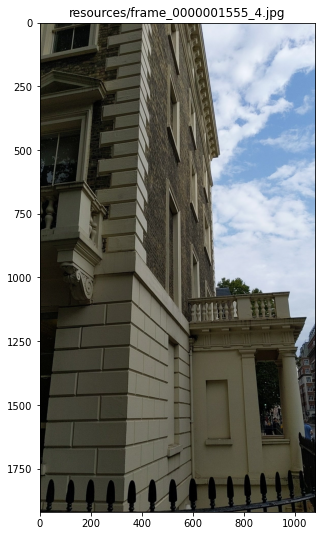

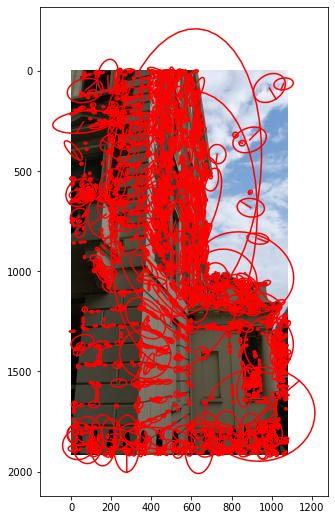

resources/frame_0000001555_4.jpg done


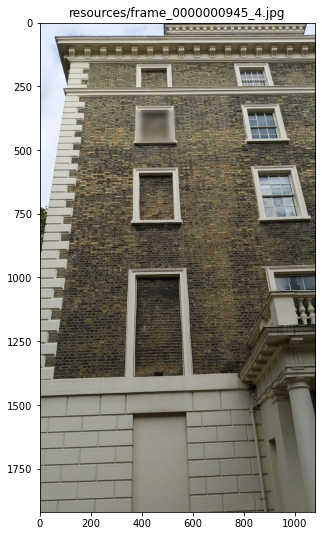

In [ ]:
import sys
sys.path.append("../")

from dense_affnet_feature import DenseAffnetFeature, get_default_config
import kornia as K
import torch
import cv2 as cv
import matplotlib.pyplot as plt
from kornia_moons.feature import visualize_LAF


def read_img(img_file_path):
    img = cv.imread(img_file_path, None)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(9, 9))
    plt.title(img_file_path)
    plt.imshow(img)
    plt.show(block=False)
    return img


def process_files(file_paths):

    config = get_default_config()
    # many more visualizations:
    # config["show_affnet"] = True
    # this will only detect every n-th feature (default=None, which is effectively 1)
    config["affnet_hard_net_filter"] = 50
    # subsumpling ratio over what dense affnet already does (default=None, which is effectively 1)
    config["affnet_dense_affnet_filter"] = 2

    dense_affnet_feature = DenseAffnetFeature(device=torch.device('cpu'), config=config)

    for file_path in file_paths:

        img = read_img(file_path)
        img_t = K.image_to_tensor(img, False).float() / 255.

        laffs, responses, descs = dense_affnet_feature.forward(img_t, None)

        laffs_scaled = laffs * responses[:, :, None]
        laffs_scaled[:, :, :, 2] = laffs[:, :, :, 2]
        every_other = 5
        visualize_LAF(img_t, laffs_scaled[:, ::every_other], figsize=(9, 9))

        print("{} done".format(file_path))


if __name__ == "__main__":

    file_names = ["resources/frame_0000001555_4.jpg",
                  "resources/frame_0000000945_4.jpg"]

    process_files(file_names)

